In [1]:
# !pip install seaborn matplotlib

In [2]:
# !pip freeze > requirements.txt

In [3]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt  #for data visualization

import warnings            
warnings.filterwarnings("ignore") 
%matplotlib inline
from scipy import stats
# from pandas.tools.plotting import parallel_coordinates

In [4]:
df = pd.read_csv('train.csv',index_col=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 1 to 874
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  874 non-null    int64  
 1   Pclass    874 non-null    int64  
 2   Name      874 non-null    object 
 3   Sex       874 non-null    object 
 4   Age       699 non-null    float64
 5   SibSp     874 non-null    int64  
 6   Parch     874 non-null    int64  
 7   Ticket    874 non-null    object 
 8   Fare      874 non-null    float64
 9   Cabin     201 non-null    object 
 10  Embarked  872 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 81.9+ KB


In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,874.000000,874.000000,699.000000,874.000000,874.000000,874.000000
mean,0.384439,2.306636,29.744163,0.530892,0.378719,32.446958
std,0.486741,0.837154,14.610096,1.111053,0.794918,50.080254
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.456250
75%,1.000000,3.000000,38.500000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print("Are There Missing Data? :",df.isnull().any().any())
print(df.isnull().sum())

Are There Missing Data? : True
Survived      0
Pclass        0
Name          0
Sex           0
Age         175
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       673
Embarked      2
dtype: int64


In [8]:
numeric_features = ['Age', 'Fare']
categorical_features = ['Embarked', 'Sex', 'Pclass']

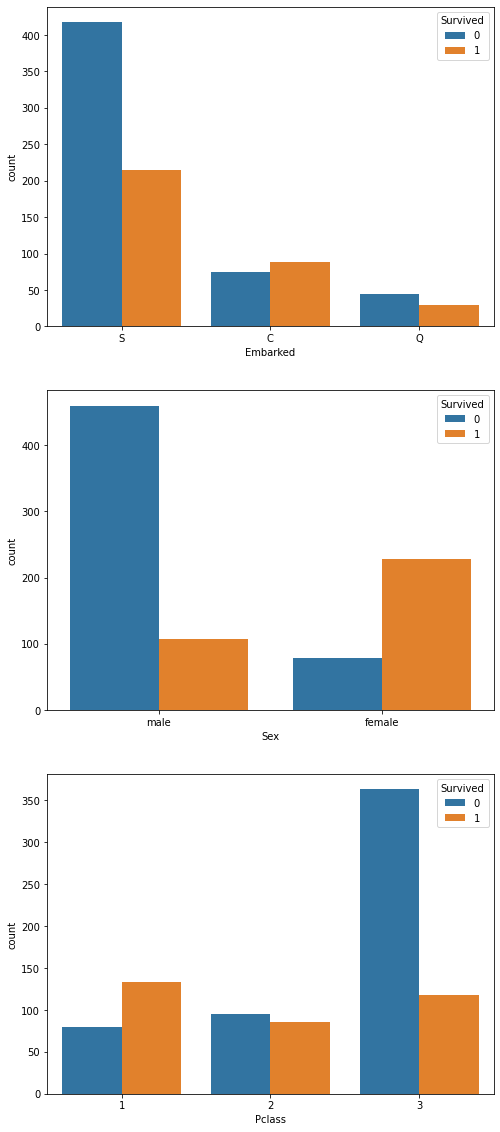

In [9]:
fig, axs = plt.subplots(nrows=3, figsize=(8,20), sharex=False)
for i in range(3):
    sns.countplot(x=categorical_features[i], data=df, hue='Survived', ax=axs[i])

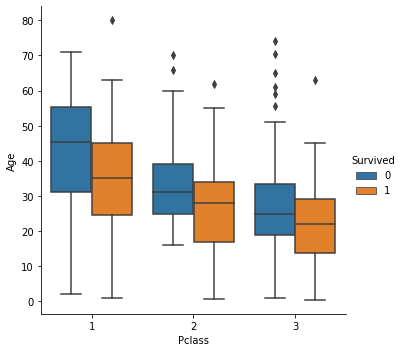

In [10]:
sns.factorplot(x="Pclass", y="Age", hue="Survived", data=df, kind="box")


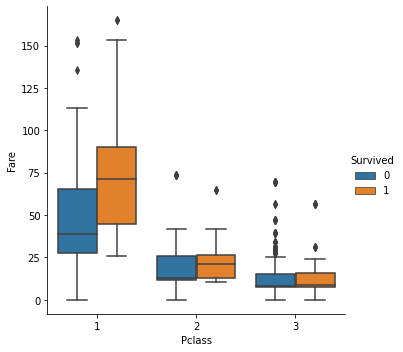

In [11]:
sns.factorplot(x="Pclass", y="Fare", hue="Survived", data=df[df.Fare < 200], kind="box")

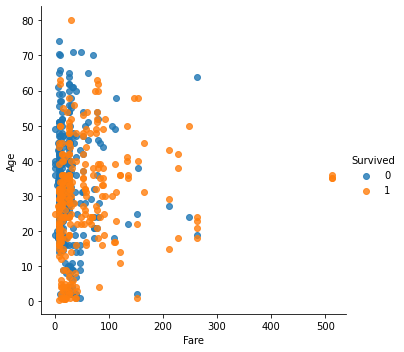

In [12]:
sns.lmplot(x="Fare", y="Age", hue="Survived", data=df, fit_reg=False)

In [13]:
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [14]:
df.groupby('Sex')['Age'].mean()


Sex
female    27.881890
male      30.807124
Name: Age, dtype: float64

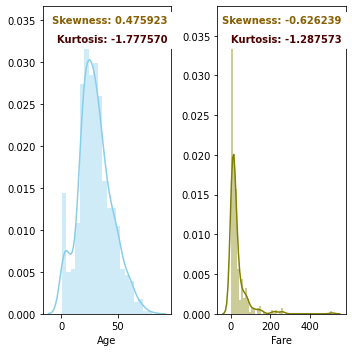

In [15]:
f, axes = plt.subplots(1, 2,  figsize=(5, 5))
sns.distplot(df['Age'], color="skyblue", ax=axes[0])
sns.distplot(df['Fare'], color="olive", ax=axes[1])
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()

In [16]:
df['Fare'],fitted_lambda = stats.boxcox(df['Fare']+.0000001)
df['Age'],fitted_lambda = stats.boxcox(df['Age']+.00000001)

Age
Fare


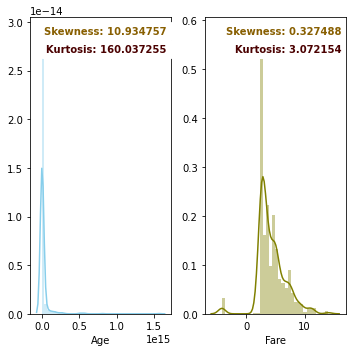

In [17]:
f, axes = plt.subplots(1, 2,  figsize=(5, 5))
sns.distplot(df['Age'], color="skyblue", ax=axes[0])
sns.distplot(df['Fare'], color="olive", ax=axes[1])
for i, ax in enumerate(axes.reshape(-1)):
    print(ax.get_xlabel())
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df[ax.get_xlabel()].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df[ax.get_xlabel()].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()

In [19]:
df.Age.describe()

count    6.990000e+02
mean     1.818882e+13
std      8.731820e+13
min     -1.179581e-01
25%      1.387741e+10
50%      2.150436e+11
75%      3.210401e+12
max      1.567631e+15
Name: Age, dtype: float64

In [21]:
df.Age.shape

(874,)